##**Import Important Libraries**

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 36.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [ ]:
# Import Important Libraries
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

In [ ]:
# Import Mediapipe libraries
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

##**Import Extracted Dataset**

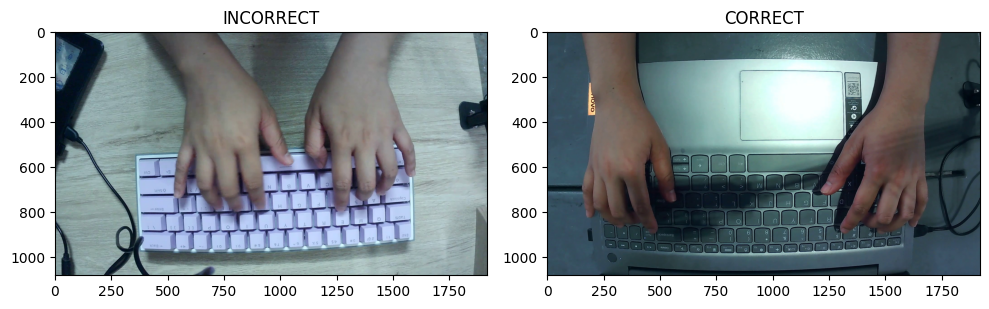

In [ ]:
handpostures_dataset = '/content/drive/MyDrive/TEAM 29 - FINALEST/FINAL HAND POSTURES DATASET'

# List all class folders
class_folders = [f for f in os.listdir(handpostures_dataset) if os.path.isdir(os.path.join(handpostures_dataset, f))]


# Plot images from each class
plt.figure(figsize=(10, 6))

for i, class_name in enumerate(class_folders, 1):
    class_path = os.path.join(handpostures_dataset, class_name)
    image_files = os.listdir(class_path)

    if image_files:
        sample_image = os.path.join(class_path, image_files[0])

        plt.subplot(1, len(class_folders), i)
        img = plt.imread(sample_image)

        plt.imshow(img)
        plt.title(class_name)
    else:
        print(f"No images found for class: {class_name}")

plt.tight_layout()
plt.show()

##**Draw Handlandmarks**

In [ ]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

In [ ]:
# Function to process an image
def draw_landmarks(image_path):
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = hands.process(image_rgb)

  # Draw landmarks
  if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
  return image

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


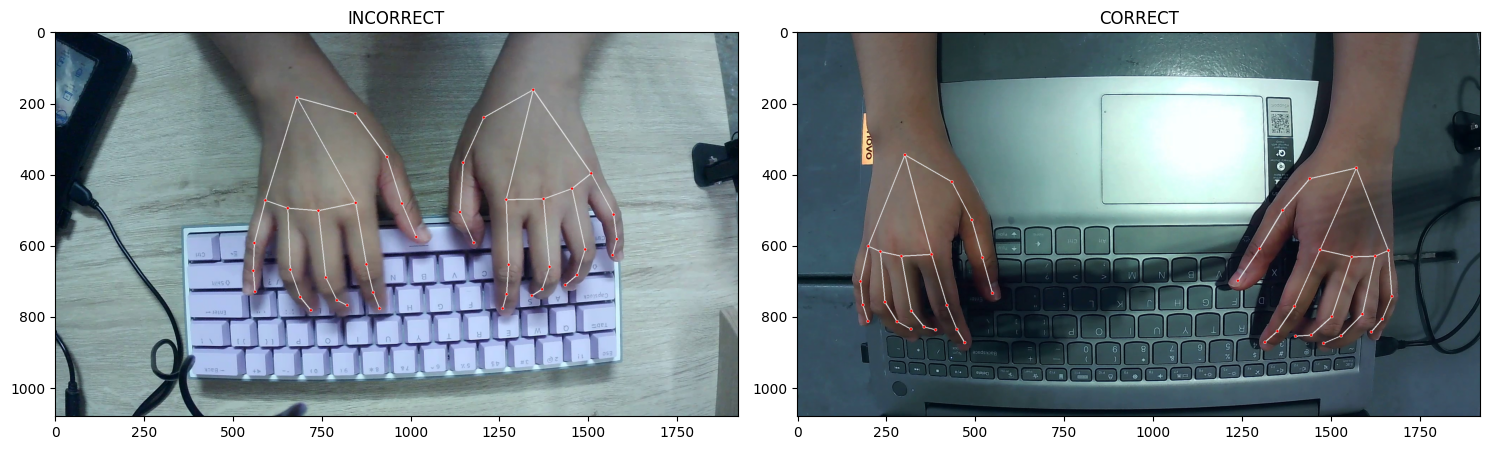

In [ ]:
class_folder = ['CORRECT', 'INCORRECT']

plt.figure(figsize=(15, 5))

for i, class_name in enumerate(class_folders, 1):
    class_path = os.path.join(handpostures_dataset, class_name)
    image_files = os.listdir(class_path)
    sample_image = os.path.join(class_path, image_files[0])

    if image_files:
        sample_image = os.path.join(class_path, image_files[0])

        plt.subplot(1, len(class_folders), i)
        img_with_landmarks = draw_landmarks(sample_image)  # Process image with landmarks

        plt.imshow(cv2.cvtColor(img_with_landmarks, cv2.COLOR_BGR2RGB))
        plt.title(class_name)

    else:
        print(f"No images found for class: {class_name}")

plt.tight_layout()
plt.show()

##**EXTRACT HAND LANDMARKS**

In [ ]:
def extract_landmarks(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    landmarks_data = []
    if results.multi_hand_landmarks:
        num_hands = min(2, len(results.multi_hand_landmarks))
        for hand_idx in range(num_hands):
            hand_landmarks = results.multi_hand_landmarks[hand_idx]
            landmarks = {}
            for idx, landmark in enumerate(hand_landmarks.landmark):
                if idx in [0, 1, 2, 5, 9, 13, 17]:
                    landmark_name = {
                        0: 'wrist',
                        1: 'thumb_cmc',
                        2: 'thumb_mcp',
                        5: 'index_finger_mcp',
                        9: 'middle_finger_mcp',
                        13: 'ring_finger_mcp',
                        17: 'pinky_mcp'
                    }.get(idx)
                    landmarks[f'{landmark_name}'] = {
                        'X': landmark.x,
                        'Y': landmark.y,
                        'Z': landmark.z if hasattr(landmark, 'z') else None
                    }
            landmarks_data.append(landmarks)
    return landmarks_data

##**Data with Handlandmarks**

In [ ]:
import pandas as pd
class_folders = ['CORRECT', 'INCORRECT']
handlandmarks_data = []

for class_name in class_folders:
    class_path = os.path.join(handpostures_dataset, class_name)
    image_files = os.listdir(class_path)
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)

        try:
            image_landmarks = extract_landmarks(image_path)
        except:
            print(f"Error extracting landmarks from {image_path}")
            continue

        if image_landmarks is not None:
            row = {'Class': class_name, 'Image': image_file}
            for hand_idx, landmarks in enumerate(image_landmarks):
                for landmark_name, coords in landmarks.items():
                    for coord, value in coords.items():
                        row[f"{landmark_name}_{coord}_hand{hand_idx}"] = value
            handlandmarks_data.append(row)

handlandmarks_data = pd.DataFrame(handlandmarks_data)
# data = data.replace({np.nan: None})

In [ ]:
handlandmarks_data

,Class,Image,wrist_X_hand0,wrist_Y_hand0,wrist_Z_hand0,thumb_cmc_X_hand0,thumb_cmc_Y_hand0,thumb_cmc_Z_hand0,thumb_mcp_X_hand0,thumb_mcp_Y_hand0,...,index_finger_mcp_Z_hand1,middle_finger_mcp_X_hand1,middle_finger_mcp_Y_hand1,middle_finger_mcp_Z_hand1,ring_finger_mcp_X_hand1,ring_finger_mcp_Y_hand1,ring_finger_mcp_Z_hand1,pinky_mcp_X_hand1,pinky_mcp_Y_hand1,pinky_mcp_Z_hand1
0,CORRECT,correct 4_frame_0873.jpg,0.818981,0.354187,7.529397e-07,0.750781,0.381656,-0.029118,0.711062,0.464233,...,-0.078552,0.152725,0.583669,-0.058128,0.122254,0.572085,-0.032995,0.104455,0.557789,-0.006899
1,CORRECT,correct 4_frame_0874.jpg,0.818261,0.353563,7.512668e-07,0.750925,0.379336,-0.028962,0.710633,0.460788,...,-0.072322,0.154204,0.581163,-0.054585,0.124027,0.568437,-0.032490,0.106342,0.552500,-0.009502
2,CORRECT,correct 4_frame_0875.jpg,0.817073,0.355363,7.423413e-07,0.748764,0.381594,-0.028750,0.708403,0.464455,...,-0.077343,0.154590,0.585148,-0.056877,0.124698,0.573261,-0.031261,0.107287,0.558132,-0.004105
3,CORRECT,correct 4_frame_0876.jpg,0.817696,0.353917,7.207578e-07,0.749025,0.380533,-0.027777,0.708068,0.463612,...,-0.062586,0.153222,0.576241,-0.046528,0.122833,0.562439,-0.027125,0.104596,0.545072,-0.007308
4,CORRECT,correct 4_frame_0877.jpg,0.819500,0.353422,7.472175e-07,0.751291,0.380033,-0.029530,0.710209,0.464217,...,-0.081931,0.152725,0.579099,-0.061279,0.122253,0.566765,-0.035929,0.105187,0.551781,-0.009399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739,INCORRECT,incorrect 5_frame_0296.jpg,0.298719,0.121783,-3.608564e-08,0.387753,0.159736,0.011468,0.436326,0.260101,...,-0.014349,0.726051,0.504808,-0.010462,0.773351,0.485612,-0.004361,0.811475,0.447630,0.002829
8740,INCORRECT,incorrect 5_frame_0297.jpg,0.298823,0.119720,-6.079431e-09,0.388334,0.159548,0.014339,0.435486,0.261079,...,-0.012352,0.727027,0.507699,-0.008061,0.773913,0.488549,-0.001577,0.810924,0.450957,0.005844
8741,INCORRECT,incorrect 5_frame_0298.jpg,0.299793,0.120477,-2.723251e-08,0.388297,0.159764,0.014166,0.436084,0.262041,...,-0.005523,0.726003,0.506115,-0.000529,0.773377,0.486661,0.006909,0.810446,0.447915,0.015605
8742,INCORRECT,incorrect 5_frame_0299.jpg,0.298976,0.119652,-5.249532e-09,0.388590,0.161251,0.013364,0.437789,0.265492,...,-0.000762,0.728083,0.504927,0.005207,0.774895,0.484743,0.013335,0.811352,0.446596,0.022721


##**EDA**

In [ ]:
handlandmarks_data.isnull().sum()

Class                          0
Image                          0
wrist_X_hand0                  0
wrist_Y_hand0                  0
wrist_Z_hand0                  0
thumb_cmc_X_hand0              0
thumb_cmc_Y_hand0              0
thumb_cmc_Z_hand0              0
thumb_mcp_X_hand0              0
thumb_mcp_Y_hand0              0
thumb_mcp_Z_hand0              0
index_finger_mcp_X_hand0       0
index_finger_mcp_Y_hand0       0
index_finger_mcp_Z_hand0       0
middle_finger_mcp_X_hand0      0
middle_finger_mcp_Y_hand0      0
middle_finger_mcp_Z_hand0      0
ring_finger_mcp_X_hand0        0
ring_finger_mcp_Y_hand0        0
ring_finger_mcp_Z_hand0        0
pinky_mcp_X_hand0              0
pinky_mcp_Y_hand0              0
pinky_mcp_Z_hand0              0
wrist_X_hand1                103
wrist_Y_hand1                103
wrist_Z_hand1                103
thumb_cmc_X_hand1            103
thumb_cmc_Y_hand1            103
thumb_cmc_Z_hand1            103
thumb_mcp_X_hand1            103
thumb_mcp_

In [ ]:
handlandmarks_data.dropna(inplace = True)

In [ ]:
handlandmarks_data.isnull().sum()

Class                        0
Image                        0
wrist_X_hand0                0
wrist_Y_hand0                0
wrist_Z_hand0                0
thumb_cmc_X_hand0            0
thumb_cmc_Y_hand0            0
thumb_cmc_Z_hand0            0
thumb_mcp_X_hand0            0
thumb_mcp_Y_hand0            0
thumb_mcp_Z_hand0            0
index_finger_mcp_X_hand0     0
index_finger_mcp_Y_hand0     0
index_finger_mcp_Z_hand0     0
middle_finger_mcp_X_hand0    0
middle_finger_mcp_Y_hand0    0
middle_finger_mcp_Z_hand0    0
ring_finger_mcp_X_hand0      0
ring_finger_mcp_Y_hand0      0
ring_finger_mcp_Z_hand0      0
pinky_mcp_X_hand0            0
pinky_mcp_Y_hand0            0
pinky_mcp_Z_hand0            0
wrist_X_hand1                0
wrist_Y_hand1                0
wrist_Z_hand1                0
thumb_cmc_X_hand1            0
thumb_cmc_Y_hand1            0
thumb_cmc_Z_hand1            0
thumb_mcp_X_hand1            0
thumb_mcp_Y_hand1            0
thumb_mcp_Z_hand1            0
index_fi

In [ ]:
handlandmarks_data.dtypes

Class                         object
Image                         object
wrist_X_hand0                float64
wrist_Y_hand0                float64
wrist_Z_hand0                float64
thumb_cmc_X_hand0            float64
thumb_cmc_Y_hand0            float64
thumb_cmc_Z_hand0            float64
thumb_mcp_X_hand0            float64
thumb_mcp_Y_hand0            float64
thumb_mcp_Z_hand0            float64
index_finger_mcp_X_hand0     float64
index_finger_mcp_Y_hand0     float64
index_finger_mcp_Z_hand0     float64
middle_finger_mcp_X_hand0    float64
middle_finger_mcp_Y_hand0    float64
middle_finger_mcp_Z_hand0    float64
ring_finger_mcp_X_hand0      float64
ring_finger_mcp_Y_hand0      float64
ring_finger_mcp_Z_hand0      float64
pinky_mcp_X_hand0            float64
pinky_mcp_Y_hand0            float64
pinky_mcp_Z_hand0            float64
wrist_X_hand1                float64
wrist_Y_hand1                float64
wrist_Z_hand1                float64
thumb_cmc_X_hand1            float64
t

In [ ]:
handlandmarks_data.describe()

,wrist_X_hand0,wrist_Y_hand0,wrist_Z_hand0,thumb_cmc_X_hand0,thumb_cmc_Y_hand0,thumb_cmc_Z_hand0,thumb_mcp_X_hand0,thumb_mcp_Y_hand0,thumb_mcp_Z_hand0,index_finger_mcp_X_hand0,...,index_finger_mcp_Z_hand1,middle_finger_mcp_X_hand1,middle_finger_mcp_Y_hand1,middle_finger_mcp_Z_hand1,ring_finger_mcp_X_hand1,ring_finger_mcp_Y_hand1,ring_finger_mcp_Z_hand1,pinky_mcp_X_hand1,pinky_mcp_Y_hand1,pinky_mcp_Z_hand1
count,8641.000000,8641.000000,8.641000e+03,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,...,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000
mean,0.363730,0.273387,2.970440e-07,0.413403,0.295581,-0.013573,0.444484,0.383520,-0.021332,0.422142,...,-0.052658,0.671675,0.534936,-0.040142,0.693315,0.530325,-0.026291,0.706354,0.509713,-0.012887
std,0.202314,0.097921,2.019354e-07,0.147410,0.074204,0.013054,0.117819,0.065240,0.021296,0.156645,...,0.026997,0.185766,0.063371,0.025015,0.213582,0.074459,0.024625,0.232986,0.084417,0.025861
min,0.092481,-0.002147,-4.215460e-07,0.148888,0.003028,-0.053071,0.172429,0.041707,-0.084846,0.083163,...,-0.131395,0.044463,0.202251,-0.116541,0.028107,0.247713,-0.107734,0.026978,0.237468,-0.097414
25%,0.244915,0.209300,1.580859e-07,0.332003,0.251221,-0.023210,0.370845,0.340348,-0.038166,0.341663,...,-0.069176,0.717580,0.492752,-0.054945,0.759749,0.482023,-0.042608,0.786243,0.453999,-0.030577
50%,0.299390,0.252000,2.761307e-07,0.383448,0.286914,-0.013333,0.432625,0.388789,-0.021736,0.395641,...,-0.056422,0.751750,0.529360,-0.043080,0.787096,0.518006,-0.028547,0.809188,0.495458,-0.016026
75%,0.347692,0.329719,3.990951e-07,0.433020,0.343712,-0.004873,0.480825,0.422023,-0.007284,0.451859,...,-0.038392,0.767332,0.577145,-0.026179,0.802651,0.572645,-0.011677,0.828597,0.556344,0.003361
max,0.849948,0.933171,8.838419e-07,0.783324,0.883247,0.040086,0.736522,0.790711,0.075143,0.807947,...,0.066834,0.938626,0.729183,0.067767,0.968963,0.726232,0.074425,0.985423,0.730250,0.098069


In [ ]:
handlandmarks_data.drop('Image', axis = 1, inplace =  True)

In [ ]:
handlandmarks_data

,Class,wrist_X_hand0,wrist_Y_hand0,wrist_Z_hand0,thumb_cmc_X_hand0,thumb_cmc_Y_hand0,thumb_cmc_Z_hand0,thumb_mcp_X_hand0,thumb_mcp_Y_hand0,thumb_mcp_Z_hand0,...,index_finger_mcp_Z_hand1,middle_finger_mcp_X_hand1,middle_finger_mcp_Y_hand1,middle_finger_mcp_Z_hand1,ring_finger_mcp_X_hand1,ring_finger_mcp_Y_hand1,ring_finger_mcp_Z_hand1,pinky_mcp_X_hand1,pinky_mcp_Y_hand1,pinky_mcp_Z_hand1
0,CORRECT,0.818981,0.354187,7.529397e-07,0.750781,0.381656,-0.029118,0.711062,0.464233,-0.053166,...,-0.078552,0.152725,0.583669,-0.058128,0.122254,0.572085,-0.032995,0.104455,0.557789,-0.006899
1,CORRECT,0.818261,0.353563,7.512668e-07,0.750925,0.379336,-0.028962,0.710633,0.460788,-0.053305,...,-0.072322,0.154204,0.581163,-0.054585,0.124027,0.568437,-0.032490,0.106342,0.552500,-0.009502
2,CORRECT,0.817073,0.355363,7.423413e-07,0.748764,0.381594,-0.028750,0.708403,0.464455,-0.053409,...,-0.077343,0.154590,0.585148,-0.056877,0.124698,0.573261,-0.031261,0.107287,0.558132,-0.004105
3,CORRECT,0.817696,0.353917,7.207578e-07,0.749025,0.380533,-0.027777,0.708068,0.463612,-0.051218,...,-0.062586,0.153222,0.576241,-0.046528,0.122833,0.562439,-0.027125,0.104596,0.545072,-0.007308
4,CORRECT,0.819500,0.353422,7.472175e-07,0.751291,0.380033,-0.029530,0.710209,0.464217,-0.053544,...,-0.081931,0.152725,0.579099,-0.061279,0.122253,0.566765,-0.035929,0.105187,0.551781,-0.009399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739,INCORRECT,0.298719,0.121783,-3.608564e-08,0.387753,0.159736,0.011468,0.436326,0.260101,0.021051,...,-0.014349,0.726051,0.504808,-0.010462,0.773351,0.485612,-0.004361,0.811475,0.447630,0.002829
8740,INCORRECT,0.298823,0.119720,-6.079431e-09,0.388334,0.159548,0.014339,0.435486,0.261079,0.026121,...,-0.012352,0.727027,0.507699,-0.008061,0.773913,0.488549,-0.001577,0.810924,0.450957,0.005844
8741,INCORRECT,0.299793,0.120477,-2.723251e-08,0.388297,0.159764,0.014166,0.436084,0.262041,0.024333,...,-0.005523,0.726003,0.506115,-0.000529,0.773377,0.486661,0.006909,0.810446,0.447915,0.015605
8742,INCORRECT,0.298976,0.119652,-5.249532e-09,0.388590,0.161251,0.013364,0.437789,0.265492,0.024362,...,-0.000762,0.728083,0.504927,0.005207,0.774895,0.484743,0.013335,0.811352,0.446596,0.022721


<ipython-input-19-0c76091f9614>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data = handlandmarks_data, palette = 'RdBu_r')


<Axes: xlabel='Class', ylabel='count'>

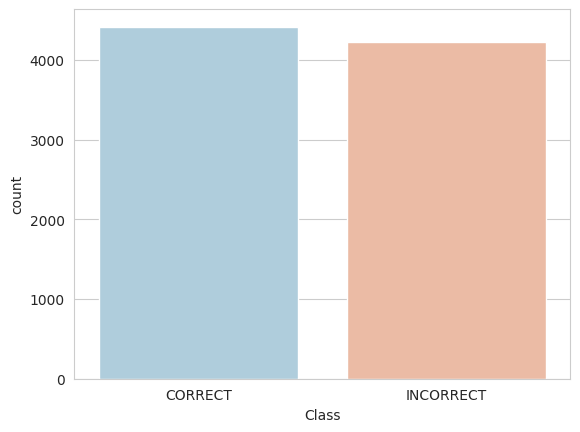

In [ ]:
# Data Visualization
sns.set_style('whitegrid')
sns.countplot(x='Class', data = handlandmarks_data, palette = 'RdBu_r')

In [ ]:
# Converting Incorrect and correct into binaries
handlandmarks_data.replace({'Class': {'INCORRECT': '0', 'CORRECT': '1'}}, inplace=True)
handlandmarks_data['Class'] = handlandmarks_data['Class'].astype(int)

##**Machine Learning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = handlandmarks_data.drop('Class', axis = 1)
y = handlandmarks_data.Class

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = 0.20,
                                                    random_state = 42)

In [ ]:
rf_model = RandomForestClassifier(max_features = 'log2', n_estimators = 17,
                                   max_depth = 8, criterion = 'gini', class_weight="balanced").fit(x_train, y_train)

In [ ]:
rf_pred1 = rf_model.predict(x_test)
rf_pred2 = rf_model.predict(x_train)

In [ ]:
rf_pred = rf_model.predict_proba(x_test)

##**Classification Report, Confusion Matrix, Accuracy Score, ROC AUC score**

RANDOM FOREST CLASSIFIER 

 TESTING CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       836
           1       0.98      0.98      0.98       893

    accuracy                           0.98      1729
   macro avg       0.98      0.98      0.98      1729
weighted avg       0.98      0.98      0.98      1729

RANDOM FOREST CLASSIFIER 

 TRAINING CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3387
           1       0.99      0.98      0.99      3525

    accuracy                           0.99      6912
   macro avg       0.99      0.99      0.99      6912
weighted avg       0.99      0.99      0.99      6912



CONFUSION MATRIX



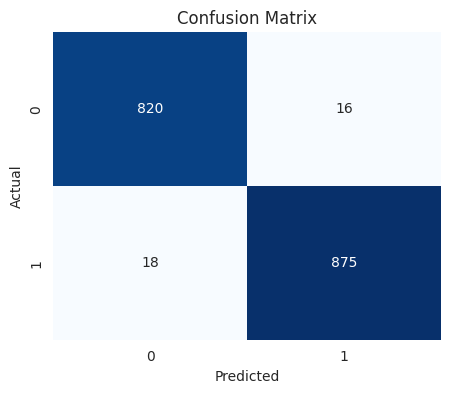



ROC AUC SCORE:  0.998458237112684


Testing Accuracy Score:  0.9803354540196646


Training Accuracy Score:  0.9858217592592593


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
print('RANDOM FOREST CLASSIFIER \n\n TESTING CLASSIFICATION REPORT \n', classification_report(y_test, rf_pred1))
print('RANDOM FOREST CLASSIFIER \n\n TRAINING CLASSIFICATION REPORT \n', classification_report(y_train, rf_pred2))

print('\n\nCONFUSION MATRIX\n')
conf_matrix = confusion_matrix(y_test, rf_pred1)
# Plot confusion matrix with colormap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

rf_pred_proba = rf_model.predict_proba(x_test)
print('\n\nROC AUC SCORE: ', roc_auc_score(y_test, rf_pred_proba[:,1]))

print('\n\nTesting Accuracy Score: ', accuracy_score(y_test, rf_pred1))
print('\n\nTraining Accuracy Score: ', accuracy_score(y_train, rf_pred2))


##**Memory Consumption**

In [ ]:
!pip install pympler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
from pympler import asizeof

model_size = asizeof.asizeof(rf_model)
model_memory = model_size * 0.001
print(f"Memory Consumption of Random Forest: {model_memory} KB")

Memory Consumption of Random Forest: 15.808 KB


##**Inference Time**

In [ ]:
# Average Inference Time of Random Forest
import time
inference_times = []

for i in range(10):
    start_time = time.time()
    prediction = rf_model.predict(x_test)
    end_time = time.time()

    inference_time_ms = (end_time - start_time) * 1000  # Convert to milliseconds
    inference_times.append(inference_time_ms)
    print(f"Trial {i + 1}: Inference time: {inference_time_ms:.2f} milliseconds")

# Calculate the average inference time
average_inference_time_ms = sum(inference_times) / 10
print(f"Average inference time over 10 trials: {average_inference_time_ms:.4f} milliseconds")

Trial 1: Inference time: 6.66 milliseconds
Trial 2: Inference time: 5.36 milliseconds
Trial 3: Inference time: 5.07 milliseconds
Trial 4: Inference time: 5.02 milliseconds
Trial 5: Inference time: 5.03 milliseconds
Trial 6: Inference time: 4.91 milliseconds
Trial 7: Inference time: 4.96 milliseconds
Trial 8: Inference time: 4.89 milliseconds
Trial 9: Inference time: 4.87 milliseconds
Trial 10: Inference time: 5.04 milliseconds
Average inference time over 10 trials: 5.1815 milliseconds


##**Model Size**

In [ ]:
!pip install joblib

In [ ]:
import joblib
import os

In [ ]:
rf_model_path = '/content/drive/MyDrive/TEAM 29 - FINALEST/ANOTHER 3 DESIGNS/joblib files/random_forest.joblib'
joblib.dump(rf_model, rf_model_path)

# Get the size of the saved model file
model_size_bytes = os.path.getsize(rf_model_path)
model_size_kb = model_size_bytes * 0.001


print("Model Size of RandomForestClassifier (KB):", model_size_kb)

Model Size of RandomForestClassifier (KB): 210.905


##**Misclassification Rate**

In [ ]:
correct_predictions = conf_matrix[0][0] + conf_matrix[1][1]
incorrect_predictions = conf_matrix[0][1] + conf_matrix[1][0]
total_predictions = correct_predictions + incorrect_predictions

misclassification_rate = (incorrect_predictions / total_predictions) * 100
print(f"Misclassification rate of Random Forest Classifier (%): {misclassification_rate}%")

Misclassification rate of Random Forest Classifier (%): 1.8295%
